<a href="https://colab.research.google.com/github/indranildchandra/ML101-Codelabs/blob/master/src/XOR_Gate_on_TF2_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow==2.0.0.alpha0
!pip install hyperas
!pip install hyperopt

    100% |████████████████████████████████| 79.9MB 230kB/s 
    100% |████████████████████████████████| 419kB 22.5MB/s 
    100% |████████████████████████████████| 61kB 26.3MB/s 
    100% |████████████████████████████████| 3.0MB 11.1MB/s 
  Found existing installation: tensorflow 1.13.1
    Uninstalling tensorflow-1.13.1:
      Successfully uninstalled tensorflow-1.13.1


In [0]:
from __future__ import print_function

import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pandas as pd
import sys

from hyperopt import Trials, STATUS_OK, tpe
from hyperas.distributions import choice
from hyperas import optim

In [0]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

In [0]:
def data():
  training_input_data = np.array([[0,0], [0,1], [1,0], [1,1]], 'float32')
  training_output_data = np.array([[0], [1], [1], [0]], 'float32')
  return training_input_data, training_output_data

In [0]:
def model(training_input_data, training_output_data):
  model = tf.keras.models.Sequential()
  
  model.add(tf.keras.layers.Dense(4, input_dim=2, activation='relu'))
  model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
  
  model.compile(loss='mean_squared_error',
             optimizer='adam',
             metrics=['binary_accuracy'])
  
  training_metadata = model.fit(training_input_data, training_output_data, epochs={{choice([50, 100, 500])}}, verbose=2)
  
  score, accuracy = model.evaluate(training_input_data, training_output_data, verbose=0)
  print('Test accuracy:', accuracy)
  return {'loss': -accuracy, 'status': STATUS_OK, 'model': model}

In [31]:
# See: https://stackoverflow.com/questions/49920031/get-the-path-of-the-notebook-on-google-colab
# Install the PyDrive wrapper & import libraries.
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Copy/download the file
fid = drive.ListFile({'q':"title='XOR_Gate_on_TF2_Example.ipynb'"}).GetList()[0]['id']
f = drive.CreateFile({'id': fid})
f.GetContentFile('XOR_Gate_on_TF2_Example.ipynb')

W0420 22:22:14.655476 139780489611136 __init__.py:44] file_cache is unavailable when using oauth2client >= 4.0.0
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/googleapiclient/discovery_cache/__init__.py", line 36, in autodetect
    from google.appengine.api import memcache
ModuleNotFoundError: No module named 'google.appengine'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/googleapiclient/discovery_cache/file_cache.py", line 33, in <module>
    from oauth2client.contrib.locked_file import LockedFile
ModuleNotFoundError: No module named 'oauth2client.contrib.locked_file'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/googleapiclient/discovery_cache/file_cache.py", line 37, in <module>
    from oauth2client.locked_file import LockedFile
ModuleNo

In [32]:
best_run, best_model = optim.minimize(model=model,
                                          data=data,
                                          max_evals=10,
                                          algo=tpe.suggest,
                                          notebook_name='XOR_Gate_on_TF2_Example',
                                          trials=Trials())

# using Hyperas to find the optimal number of epochs

>>> Imports:
#coding=utf-8

from __future__ import print_function

try:
    import matplotlib.pyplot as plt
except:
    pass

try:
    import tensorflow as tf
except:
    pass

try:
    import numpy as np
except:
    pass

try:
    import pandas as pd
except:
    pass

try:
    import sys
except:
    pass

try:
    from hyperopt import Trials, STATUS_OK, tpe
except:
    pass

try:
    from hyperas.distributions import choice
except:
    pass

try:
    from hyperas import optim
except:
    pass

try:
    import matplotlib.pylab as pylab
except:
    pass

try:
    from pydrive.auth import GoogleAuth
except:
    pass

try:
    from pydrive.drive import GoogleDrive
except:
    pass

try:
    from google.colab import auth
except:
    pass

try:
    from oauth2client.client import GoogleCredentials
except:
    pass

>>> Hyperas search space:

def get_space():
    return {
        'epochs': hp.choice('epochs', [50, 100, 500]),
    }

>>> Data
  1: 
  2: training_input_data = np.array([[0,0], 

In [0]:
training_input_data = np.array([[0,0], [0,1], [1,0], [1,1]], 'float32')
training_output_data = np.array([[0], [1], [1], [0]], 'float32')

In [41]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Dense(4, input_dim=2, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
  
model.compile(loss='mean_squared_error',
             optimizer='adam',
             metrics=['binary_accuracy'])
  
training_metadata = model.fit(training_input_data, training_output_data, epochs=700, verbose=2)
  
score, accuracy = model.evaluate(training_input_data, training_output_data, verbose=0)

print('Test accuracy:', accuracy)

Epoch 1/700
4/4 - 0s - loss: 0.2362 - binary_accuracy: 0.7500
Epoch 2/700
4/4 - 0s - loss: 0.2357 - binary_accuracy: 0.5000
Epoch 3/700
4/4 - 0s - loss: 0.2351 - binary_accuracy: 0.5000
Epoch 4/700
4/4 - 0s - loss: 0.2346 - binary_accuracy: 0.5000
Epoch 5/700
4/4 - 0s - loss: 0.2341 - binary_accuracy: 0.5000
Epoch 6/700
4/4 - 0s - loss: 0.2336 - binary_accuracy: 0.5000
Epoch 7/700
4/4 - 0s - loss: 0.2331 - binary_accuracy: 0.5000
Epoch 8/700
4/4 - 0s - loss: 0.2326 - binary_accuracy: 0.5000
Epoch 9/700
4/4 - 0s - loss: 0.2321 - binary_accuracy: 0.5000
Epoch 10/700
4/4 - 0s - loss: 0.2316 - binary_accuracy: 0.5000
Epoch 11/700
4/4 - 0s - loss: 0.2312 - binary_accuracy: 0.5000
Epoch 12/700
4/4 - 0s - loss: 0.2307 - binary_accuracy: 0.5000
Epoch 13/700
4/4 - 0s - loss: 0.2302 - binary_accuracy: 0.5000
Epoch 14/700
4/4 - 0s - loss: 0.2298 - binary_accuracy: 0.5000
Epoch 15/700
4/4 - 0s - loss: 0.2293 - binary_accuracy: 0.5000
Epoch 16/700
4/4 - 0s - loss: 0.2288 - binary_accuracy: 0.5000
E

In [0]:
loss_curve = training_metadata.history['loss']
accuracy_curve = training_metadata.history['binary_accuracy']

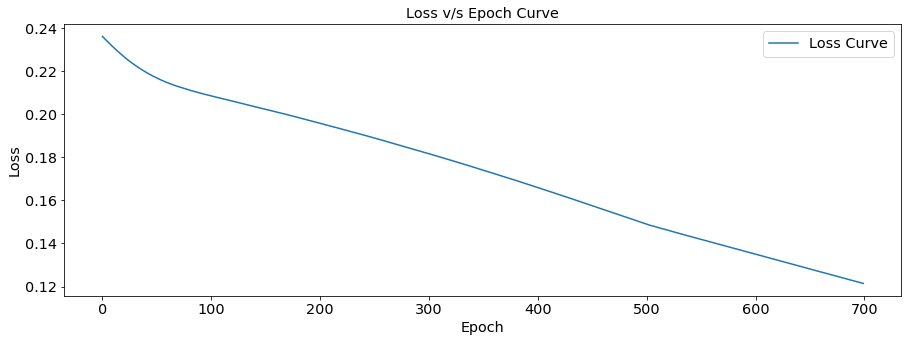

In [43]:
plt.plot(loss_curve, label="Loss Curve")
plt.legend(loc='upper right')
plt.title("Loss v/s Epoch Curve")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

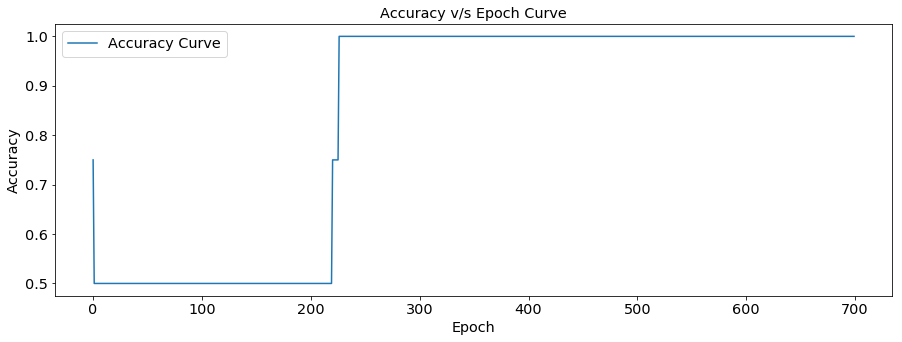

In [44]:
plt.plot(accuracy_curve, label="Accuracy Curve")
plt.legend(loc='best')
plt.title("Accuracy v/s Epoch Curve")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()